### Keras - MNIST MLP

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import to_categorical

import tensorflow as tf
import matplotlib.pyplot as plt

def Analyze_training(h):
# summarize history for accuracy
   plt.plot(h.history['acc'])
   plt.plot(h.history['val_acc'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

Using TensorFlow backend.


    You'll obtain around 98% with 20 epochs

In [2]:
batch_size = 128
epochs = 20
hlayer1 = 512
hlayer2 = 512

    Prepare Data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

    Definition of a Simple [784:512:512:10] Network

In [5]:
model = Sequential()
model.add(Dense(hlayer1, activation='relu', input_shape=(784,)))
model.add(Dropout(rate=0.2))
model.add(Dense(hlayer2, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________

    Method Fit Trains Network !

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 370us/step - loss: 0.2445 - acc: 0.9252 - val_loss: 0.1102 - val_acc: 0.9647
Epoch 2/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.1029 - acc: 0.9684 - val_loss: 0.0811 - val_acc: 0.9741
Epoch 3/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.0763 - acc: 0.9770 - val_loss: 0.0702 - val_acc: 0.9796
Epoch 4/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0617 - acc: 0.9813 - val_loss: 0.0674 - val_acc: 0.9819
Epoch 5/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.0504 - acc: 0.9845 - val_loss: 0.0714 - val_acc: 0.9822
Epoch 6/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0426 - acc: 0.9863 - val_loss: 0.0688 - val_acc: 0.9820
Epoch 7/20
60000/60000 [==============================] - 8s 132us/step -

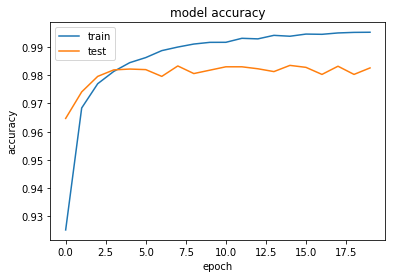

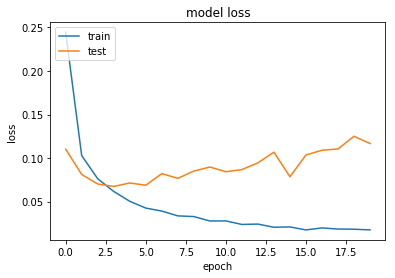

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Test loss: 0.11669888980018821
Test accuracy: 0.9826
Train accuracy: 0.99855


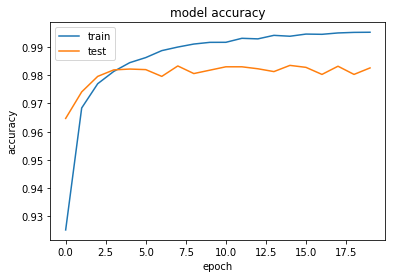

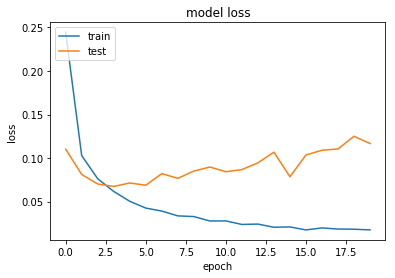

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Analyze_training(history)